TASK 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOAD DATA
df=pd.read_csv("C:/Users/hp\Downloads/retail_sales_dataset.csv")

In [3]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
numeric_stats = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()
print("📊 Descriptive Statistics for Numerical Columns:\n")
print(numeric_stats)

📊 Descriptive Statistics for Numerical Columns:

              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000


In [8]:

print("\nMode values:")
print(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode().iloc[0])


print("\nVariance:")
print(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].var())

print("\nStandard Deviation:")
print(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std())


Mode values:
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

Variance:
Age                  187.181518
Quantity               1.283087
Price per Unit     35979.016917
Total Amount      313597.347347
dtype: float64

Standard Deviation:
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


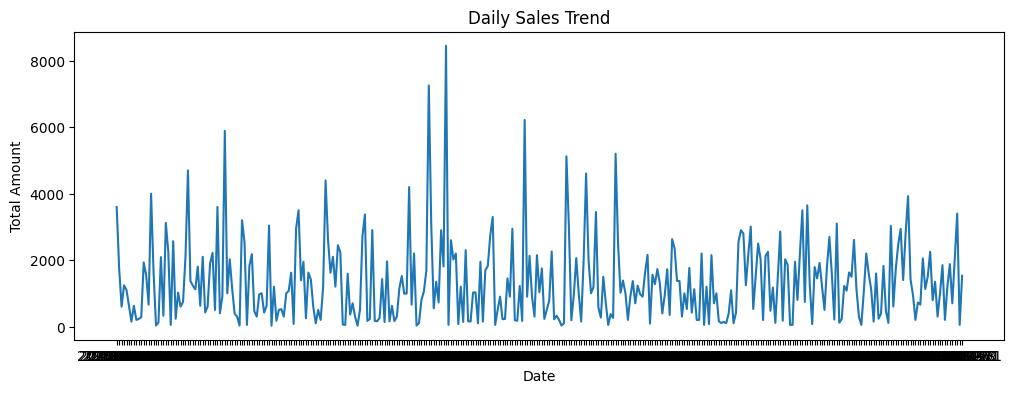

In [12]:
# TIME SERIES ANALYSIS
daily_sales = df.groupby("Date")["Total Amount"].sum().sort_index()

plt.figure(figsize=(12,4))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.show()

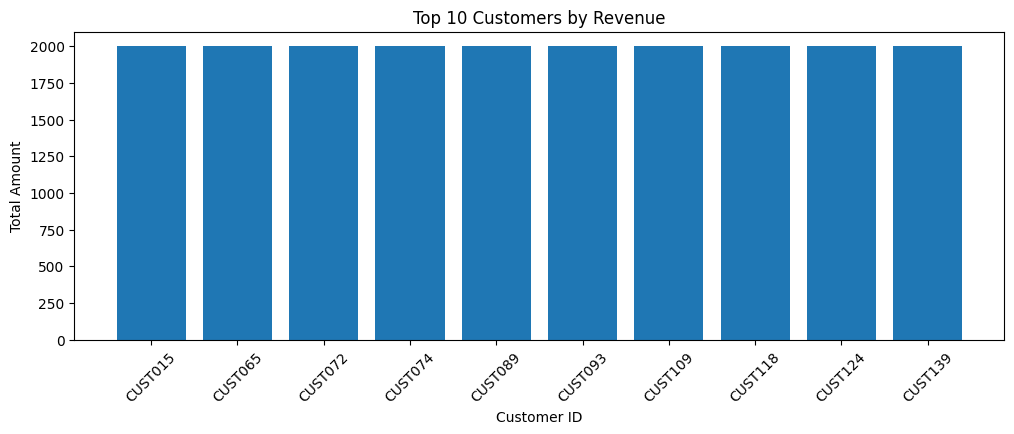

In [16]:
#CUSTOMER & PRODUCT ANALYSIS

top_customers = df.groupby("Customer ID")["Total Amount"].sum().nlargest(10)

plt.figure(figsize=(12,4))
plt.bar(top_customers.index, top_customers.values)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

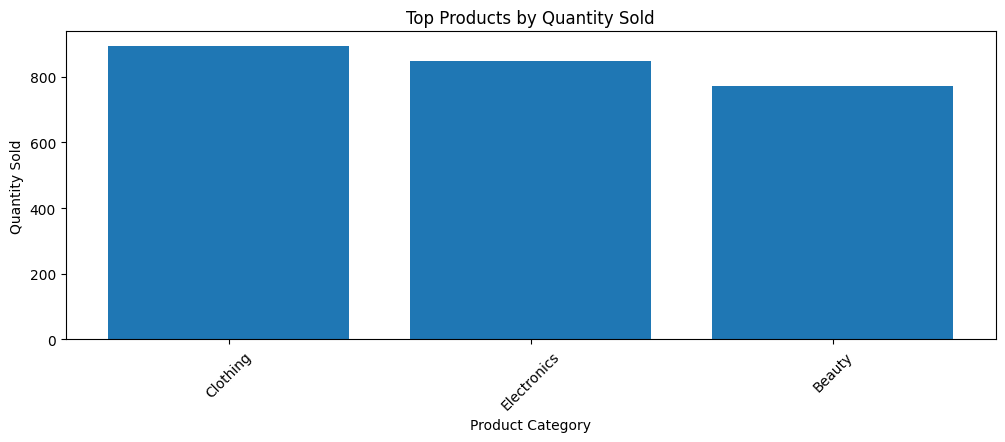

In [17]:
top_products_qty = df.groupby("Product Category")["Quantity"].sum().nlargest(10)

plt.figure(figsize=(12,4))
plt.bar(top_products_qty.index, top_products_qty.values)
plt.title("Top Products by Quantity Sold")
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

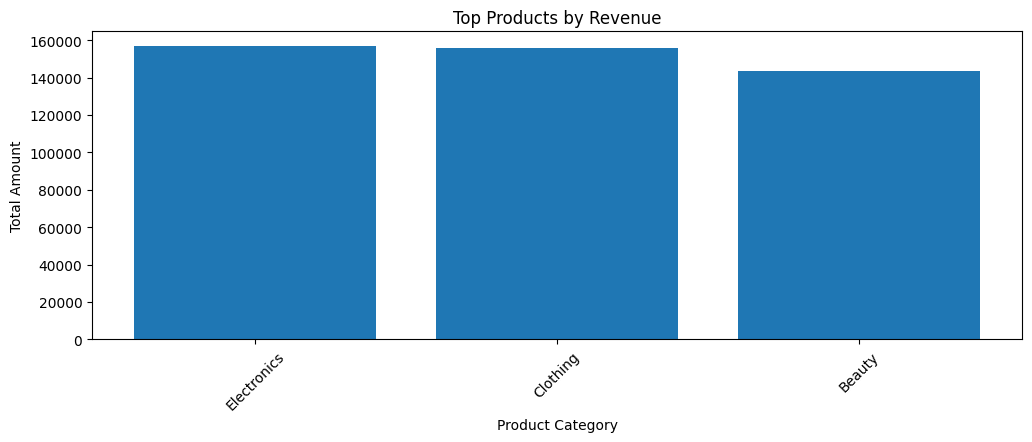

In [18]:
# Top products (Revenue)
top_products_rev = df.groupby("Product Category")["Total Amount"].sum().nlargest(10)

plt.figure(figsize=(12,4))
plt.bar(top_products_rev.index, top_products_rev.values)
plt.title("Top Products by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


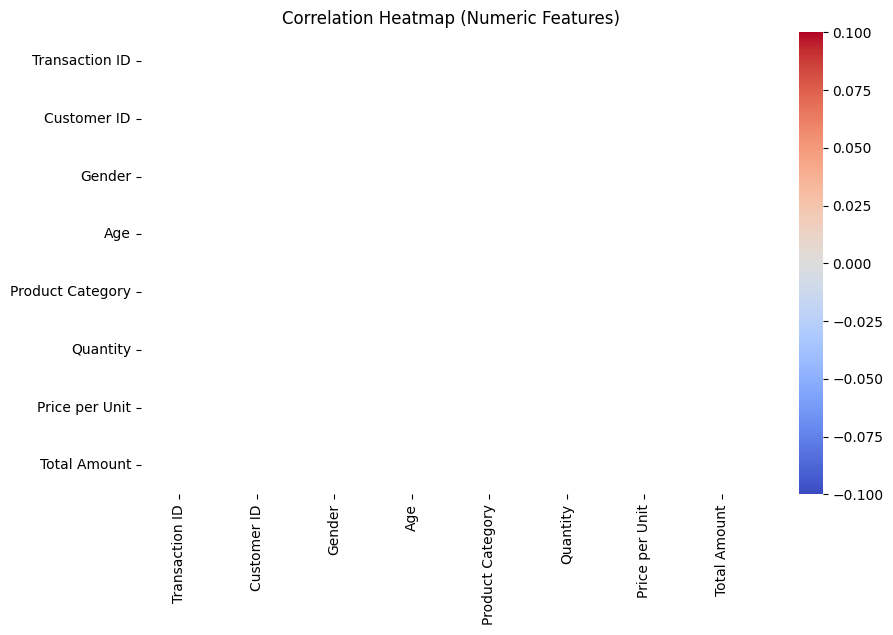

In [19]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_stats].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
